# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

In [5]:
y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

In [6]:
y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

Let's do an exploratory plot in order to decide the range of depths we compute

In [39]:
exploratory_depths = [1, 5, 10, 15, 20, 25, 30, 50]

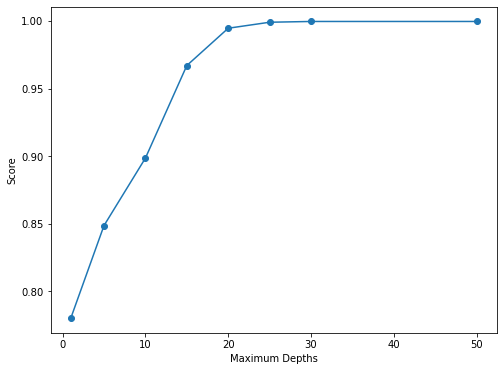

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(exploratory_depths, [DecisionTreeClassifier(max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], marker= 'o')
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.show()

Maximum depth=25 and over perform the same.

In [46]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 17, 20, 25, 30]

In [47]:
models_list = [DecisionTreeClassifier(max_depth = i) for i in max_depth]
names_list = ['DT_'+str(i) for i in max_depth]

In [48]:
metrics = classification(models_list, names_list, '../../../data/metrics/car_insurance/decision_tree.csv', X_train, y_train, X_validation, y_validation)
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
DT_1,0.024803,0.761215,0.743934,-2.270166
DT_3,0.021941,0.877156,0.872537,-0.526603
DT_5,0.028981,0.912848,0.897837,-1.644434
DT_7,0.033910,0.932406,0.896287,-3.873785
DT_10,0.038895,0.965218,0.864442,-10.440685
DT_12,0.040863,0.984194,0.825966,-16.076885
DT_15,0.046875,0.996800,0.788942,-20.852529
DT_17,0.043882,0.999124,0.773524,-22.579725
DT_20,0.047899,0.999909,0.761022,-23.890857
DT_25,0.047845,0.999997,0.753220,-24.677795


We choose **DT_5** as the best tree because it achieves the highest AUC in validation with a very good delta.

In [67]:
!pip install graphviz

Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [72]:
from sklearn.tree import export_graphviz

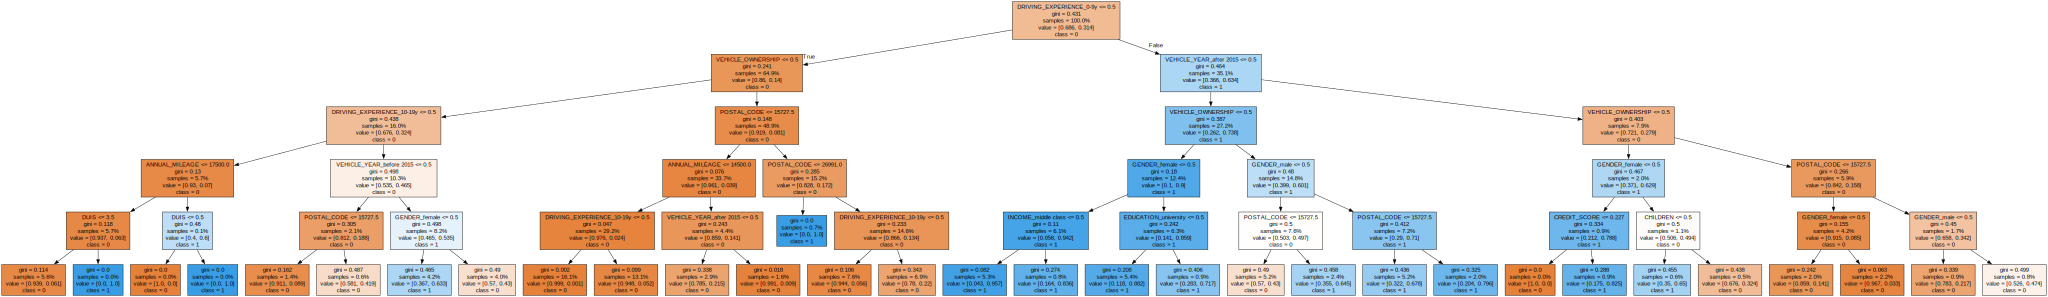

In [74]:
tree5 = export_graphviz(models_list[2], out_file=None, 
                                feature_names=X_train.columns,
                                filled=True, proportion=True, class_names=['0', '1'])

graph5 = graphviz.Source(tree5, format="png")
graph5